In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# To validate and demonstrate the high generalization and applicability of the HFBTP dataset, thereby demonstrating its value.
# We conducted data analysis and aggregation on HFBTP and related blockchain performance datasets to demonstrate that these datasets have similar data distributions and trends.
# We will continue to update this Notebook!!!

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data drawing
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2
# Using string concatenation to generate dynamic variables reduces excessive code redundancy.
Dataset = ["BPD","HFBTP"] # Dataset, BPD (3120 in total), HFBTP (24687 in total)
BPDpath = "/kaggle/input/blockchain-performance/BPD.csv"
HFBTPpath = "/kaggle/input/hfbtp-a-blockchain-performance-dataset/HFBTP.csv"

In [2]:
BPDdata = pd.read_csv(BPDpath)
HFBTPdata = pd.read_csv(HFBTPpath)

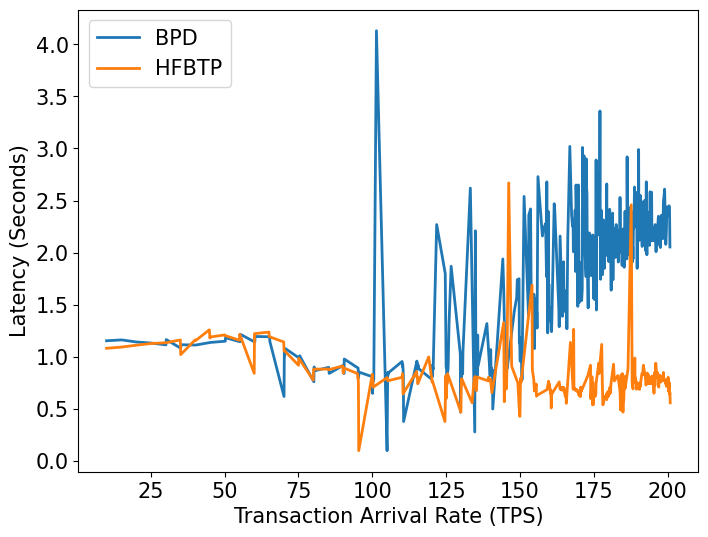

In [3]:
# Part 1: Average Latency
avglatency = {
}
drawdata = {
}
for content in Dataset:
    avglatency.setdefault(content,{})
    drawdata.setdefault(content,[])

for i,j in zip(BPDdata["Send Rates"],BPDdata["Avg Latency"]):
    if i not in avglatency["BPD"]:
        avglatency["BPD"].setdefault(i,[1,j])
    else:
        avglatency["BPD"][i][0]+=1
        avglatency["BPD"][i][1]+=j
for i,j in zip(HFBTPdata["Actual Transaction Arrival Rate"],HFBTPdata["Avg Latency"]):
    if i not in avglatency["HFBTP"]:
        avglatency["HFBTP"].setdefault(i,[1,j])
    else:
        avglatency["HFBTP"][i][0]+=1
        avglatency["HFBTP"][i][1]+=j
        
for content in Dataset:
    for key in avglatency[content]:
        avglatency[content][key][1]/=avglatency[content][key][0]
        drawdata[content].append([key,avglatency[content][key][1]])
    drawdata[content].sort()

plt.xlabel("Transaction Arrival Rate (TPS)")
plt.ylabel("Latency (Seconds)")
for content in Dataset:
    plt.plot([i[0] for i in drawdata[content]],[i[1] for i in drawdata[content]],label=content)
plt.legend(loc="upper left")
plt.show()

# Conclusion 1: latency will be affected by the performance of computing devices, but the overall trend is similar.

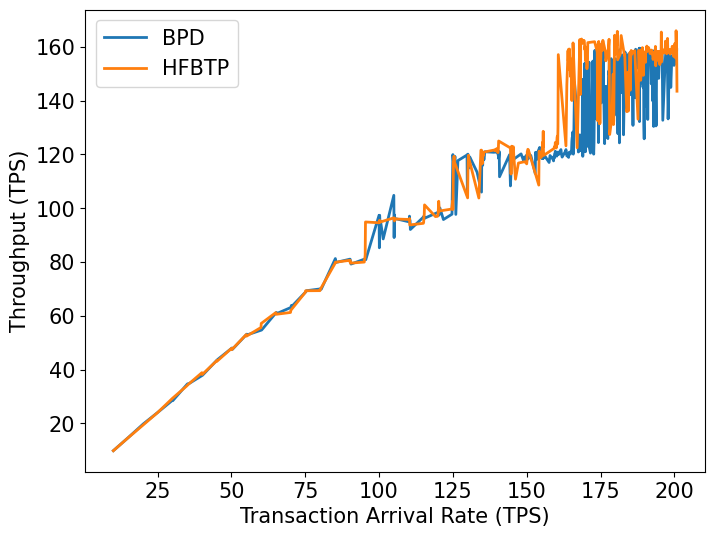

In [4]:
# Part 2: Average Throughput
avgthroughput = {
}
drawdata = {
}
for content in Dataset:
    avgthroughput.setdefault(content,{})
    drawdata.setdefault(content,[])

for i,j in zip(BPDdata["Send Rates"],BPDdata["Throughput"]):
    if i not in avgthroughput["BPD"]:
        avgthroughput["BPD"].setdefault(i,[1,j])
    else:
        avgthroughput["BPD"][i][0]+=1
        avgthroughput["BPD"][i][1]+=j
for i,j in zip(HFBTPdata["Actual Transaction Arrival Rate"],HFBTPdata["Throughput"]):
    if i not in avgthroughput["HFBTP"]:
        avgthroughput["HFBTP"].setdefault(i,[1,j])
    else:
        avgthroughput["HFBTP"][i][0]+=1
        avgthroughput["HFBTP"][i][1]+=j
        
for content in Dataset:
    for key in avgthroughput[content]:
        avgthroughput[content][key][1]/=avgthroughput[content][key][0]
        drawdata[content].append([key,avgthroughput[content][key][1]])
    drawdata[content].sort()

plt.xlabel("Transaction Arrival Rate (TPS)")
plt.ylabel("Throughput (TPS)")
for content in Dataset:
    plt.plot([i[0] for i in drawdata[content]],[i[1] for i in drawdata[content]],label=content)
plt.legend(loc="upper left")
plt.show()

# Conclusion 2: The overall trend of throughput is very close, even if devices with different computing capabilities are used.

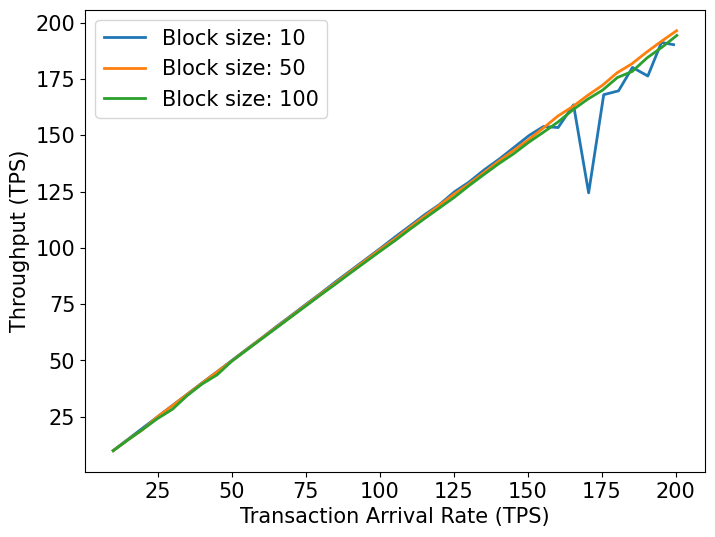

In [5]:
# Part 3: The effect of blocksize for throughput
plt.xlabel("Transaction Arrival Rate (TPS)")
plt.ylabel("Throughput (TPS)")
plt.plot(HFBTPdata[(HFBTPdata["Block Size"]==10) & (HFBTPdata["Orderers"]==3)]["Actual Transaction Arrival Rate"],HFBTPdata[(HFBTPdata["Block Size"]==10) & (HFBTPdata["Orderers"]==3)]["Throughput"],label="Block size: 10")
plt.plot(HFBTPdata[(HFBTPdata["Block Size"]==50) & (HFBTPdata["Orderers"]==3)]["Actual Transaction Arrival Rate"],HFBTPdata[(HFBTPdata["Block Size"]==50) & (HFBTPdata["Orderers"]==3)]["Throughput"],label="Block size: 50")
plt.plot(HFBTPdata[(HFBTPdata["Block Size"]==100) & (HFBTPdata["Orderers"]==3)]["Actual Transaction Arrival Rate"],HFBTPdata[(HFBTPdata["Block Size"]==100) & (HFBTPdata["Orderers"]==3)]["Throughput"],label="Block size: 100")
plt.legend(loc="upper left")
plt.show()

# Conclusion 3: Setting different block sizes will affect the throughput.

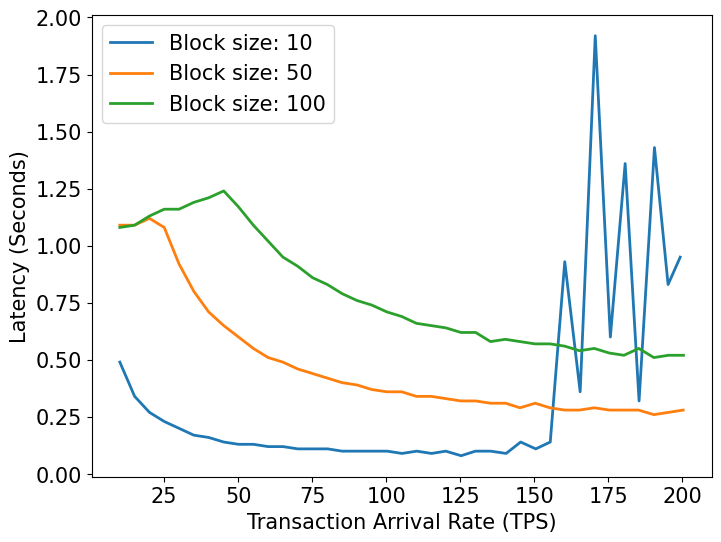

In [6]:
# Part 4: The effect of blocksize for latency
plt.xlabel("Transaction Arrival Rate (TPS)")
plt.ylabel("Latency (Seconds)")
plt.plot(HFBTPdata[(HFBTPdata["Block Size"]==10) & (HFBTPdata["Orderers"]==3)]["Actual Transaction Arrival Rate"],HFBTPdata[(HFBTPdata["Block Size"]==10) & (HFBTPdata["Orderers"]==3)]["Avg Latency"],label="Block size: 10")
plt.plot(HFBTPdata[(HFBTPdata["Block Size"]==50) & (HFBTPdata["Orderers"]==3)]["Actual Transaction Arrival Rate"],HFBTPdata[(HFBTPdata["Block Size"]==50) & (HFBTPdata["Orderers"]==3)]["Avg Latency"],label="Block size: 50")
plt.plot(HFBTPdata[(HFBTPdata["Block Size"]==100) & (HFBTPdata["Orderers"]==3)]["Actual Transaction Arrival Rate"],HFBTPdata[(HFBTPdata["Block Size"]==100) & (HFBTPdata["Orderers"]==3)]["Avg Latency"],label="Block size: 100")
plt.legend(loc="upper left")
plt.show()

# Conclusion 4: Setting different block sizes will affect the latency.